In [1]:
import pandas as pd
import numpy as np

In [3]:
data1 = pd.read_excel(r'C:\Users\Rookie\Desktop\数模\npmcm2019d\npmcm2019-D\原始数据\文件1.xlsx')
data1.head()

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
0,2017/12/18 13:42:13.000.,0.0,0.0,-0.396,-0.900,119.367781,25.992420,775,18,58.02,0.0,0.1465,22,2.30
1,2017/12/18 13:42:14.000.,0.0,0.0,-0.378,-0.882,119.367783,25.992418,775,17,60.30,0.0,0.1465,21,2.39
2,2017/12/18 13:42:15.000.,0.0,0.0,-0.396,-0.882,119.367785,25.992416,775,17,55.24,0.0,0.1464,22,2.19
3,2017/12/18 13:42:16.000.,0.0,0.0,-0.378,-0.900,119.367785,25.992416,762,17,55.75,0.0,0.1471,21,2.21
4,2017/12/18 13:42:17.000.,0.0,0.0,-0.396,-0.882,119.367785,25.992416,762,16,56.00,0.0,0.1471,21,2.22


In [6]:
data1.shape

(185725, 14)

In [7]:
data1.iloc[:,1]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
185720    4.5
185721    0.0
185722    0.0
185723    0.0
185724    0.0
Name: GPS车速, Length: 185725, dtype: float64

In [9]:
data1.iloc[:,1].value_counts(0)

0.0      43400
0.2        707
0.1        493
31.7       345
28.5       331
         ...  
103.2        1
107.8        1
108.3        1
99.0         1
105.5        1
Name: GPS车速, Length: 1084, dtype: int64

In [2]:
import scipy

In [4]:
scipy.__version__

'1.4.1'

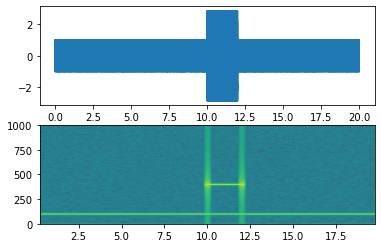

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

dt = 0.0005
t = np.arange(0.0, 20.0, dt)
s1 = np.sin(2 * np.pi * 100 * t)
s2 = 2 * np.sin(2 * np.pi * 400 * t)

# create a transient "chirp"
s2[t <= 10] = s2[12 <= t] = 0

# add some noise into the mix
nse = 0.01 * np.random.random(size=len(t))

x = s1 + s2 + nse  # the signal
NFFT = 1024  # the length of the windowing segments
Fs = int(1.0 / dt)  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t, x)
Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
plt.show()